In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [2]:
# Load the CIFAR-10 dataset
(_, _), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [4]:
# Choose 10 random indices
random_indices = np.random.choice(len(x_test), size=10, replace=False)


In [5]:
# Label mapping
label_mapping = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

In [9]:
# Define random_indices
random_indices = np.random.choice(len(x_test), 10, replace=False)

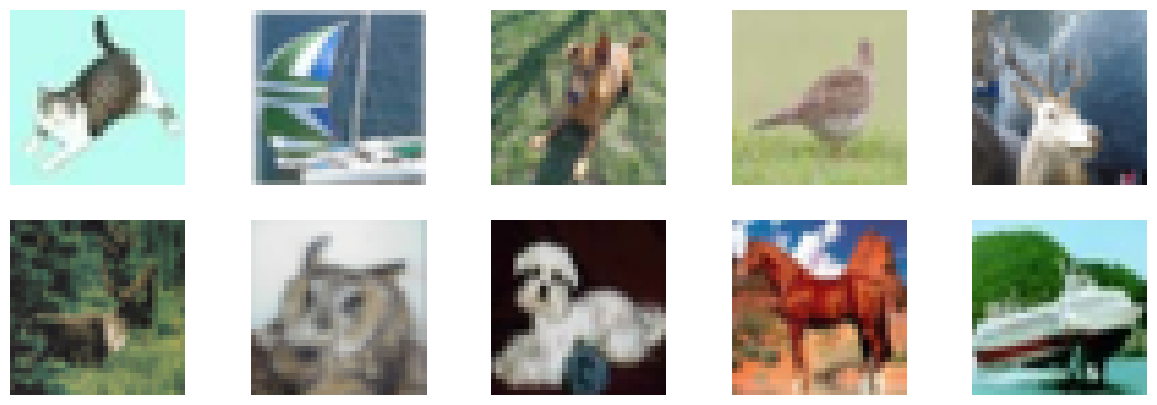

In [16]:
# Plot the random images with labels
plt.figure(figsize=(15, 5))
for i, idx in enumerate(random_indices, 1):
    plt.subplot(2, 5, i)
    plt.imshow(x_test[idx], cmap='gray')  # assuming grayscale images
    plt.axis('off')

plt.show()

In [17]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt


In [18]:
# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [19]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [20]:
# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [21]:
# Apply data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
datagen.fit(x_train)

In [24]:
# Define the model with Batch Normalization
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3)),
    BatchNormalization(),
    Activation('relu'),

    Flatten(),

    Dense(64),
    BatchNormalization(),
    Activation('relu'),

    Dense(10, activation='softmax')
])
def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 10:
        lr *= 0.1
    return lr

initial_lr = lr_schedule(0)
model.compile(optimizer=Adam(learning_rate=initial_lr),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

lr_scheduler = LearningRateScheduler(lr_schedule)
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=5, validation_data=(x_test, y_test),
                    callbacks=[lr_scheduler])

Epoch 1/5
1563/1563 [==============================] - 69s 43ms/step - loss: 1.4552 - accuracy: 0.4761 - val_loss: 1.6949 - val_accuracy: 0.4650 - lr: 0.0010
Epoch 2/5
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1681 - accuracy: 0.5851 - val_loss: 1.1732 - val_accuracy: 0.5854 - lr: 0.0010
Epoch 3/5
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0558 - accuracy: 0.6300 - val_loss: 1.0801 - val_accuracy: 0.6234 - lr: 0.0010
Epoch 4/5
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9899 - accuracy: 0.6517 - val_loss: 1.1283 - val_accuracy: 0.6140 - lr: 0.0010
Epoch 5/5
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9399 - accuracy: 0.6702 - val_loss: 1.2234 - val_accuracy: 0.6004 - lr: 0.0010


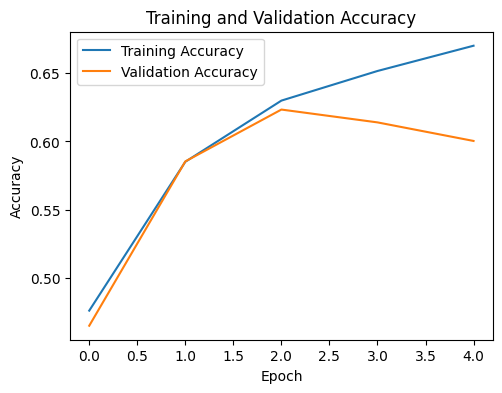

In [25]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

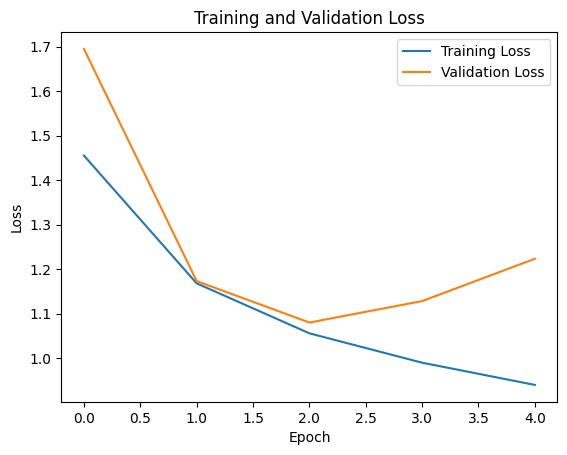

In [27]:
# Plot training and validation loss
plt.subplot(1, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


In [28]:
# Show the plots
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

## Measuring Model Performance with F1 score

> Add blockquote




In [29]:
import numpy as np
from sklearn.metrics import f1_score

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

313/313 - 3s - loss: 1.2234 - accuracy: 0.6004 - 3s/epoch - 8ms/step


In [30]:
# Calculate F1 score
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

313/313 [==============================] - 5s 15ms/step


In [31]:
print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test F1 Score: {f1:.4f}')

Test accuracy: 0.6004
Test F1 Score: 0.5783


# **Introducing Learning scheduler Callback and Adding additional layer**

In [32]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

In [33]:
# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [34]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [35]:
# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)

y_test = to_categorical(y_test, 10)

In [36]:
# Apply data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
datagen.fit(x_train)

In [38]:
# Define the model with Batch Normalization
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3)),
    BatchNormalization(),
    Activation('relu'),

    Flatten(),

    Dense(64),
    BatchNormalization(),
    Activation('relu'),

    Dense(10, activation='softmax')
])
def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 10:
        lr *= 0.1
    return lr

initial_lr = lr_schedule(0)
model.compile(optimizer=Adam(learning_rate=initial_lr),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

lr_scheduler = LearningRateScheduler(lr_schedule)
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=5, validation_data=(x_test, y_test),
                    callbacks=[lr_scheduler])

Epoch 1/5
782/782 [==============================] - 66s 82ms/step - loss: 1.4616 - accuracy: 0.4728 - val_loss: 1.3366 - val_accuracy: 0.5268 - lr: 0.0010
Epoch 2/5
782/782 [==============================] - 64s 82ms/step - loss: 1.1655 - accuracy: 0.5858 - val_loss: 1.0653 - val_accuracy: 0.6216 - lr: 0.0010
Epoch 3/5
782/782 [==============================] - 67s 86ms/step - loss: 1.0432 - accuracy: 0.6312 - val_loss: 1.3720 - val_accuracy: 0.5384 - lr: 0.0010
Epoch 4/5
782/782 [==============================] - 66s 84ms/step - loss: 0.9709 - accuracy: 0.6566 - val_loss: 1.4362 - val_accuracy: 0.5483 - lr: 0.0010
Epoch 5/5
782/782 [==============================] - 65s 83ms/step - loss: 0.9154 - accuracy: 0.6793 - val_loss: 0.8569 - val_accuracy: 0.7068 - lr: 0.0010


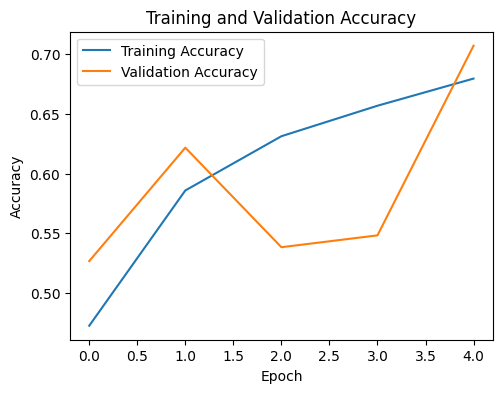

In [39]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

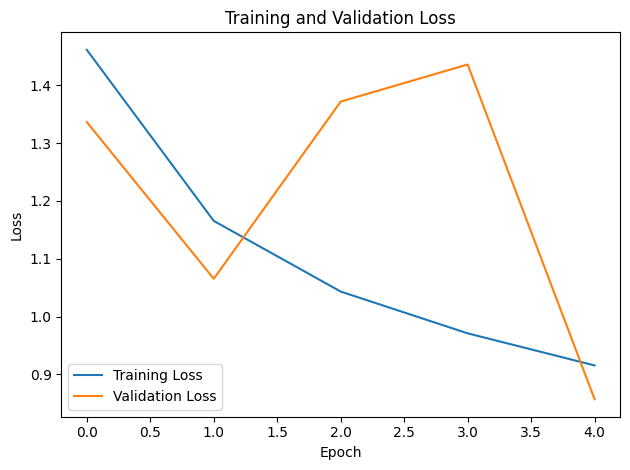

In [41]:
# Plot training and validation loss
plt.subplot(1, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [42]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt


In [43]:
# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [44]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(32, 32, 3), kernel_regularizer=l2(1e-5)),
    BatchNormalization(), Activation('relu'), MaxPooling2D((2, 2)),
    Dropout(0.1),  # Lowered dropout rate

    Conv2D(64, (3, 3), kernel_regularizer=l2(1e-5)),
    BatchNormalization(), Activation('relu'), MaxPooling2D((2, 2)),
    Dropout(0.2),  # Lowered dropout rate

    Conv2D(64, (3, 3), kernel_regularizer=l2(1e-5)),
    BatchNormalization(), Activation('relu'),
    Dropout(0.3),  # Lowered dropout rate

    Flatten(),
    Dense(64, kernel_regularizer=l2(1e-5)),
    BatchNormalization(), Activation('relu'),
    Dropout(0.4),  # Lowered dropout rate

    Dense(10, activation='softmax')
])


In [45]:
# Compile the model with Adam optimizer and initial learning rate
initial_lr = 1e-3
model.compile(optimizer=Adam(learning_rate=initial_lr),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
# Define learning rate schedule
def lr_schedule(epoch):
    if epoch < 10:
        return initial_lr
    else:
        return initial_lr * (0.5 ** (epoch // 10))

lr_scheduler = LearningRateScheduler(lr_schedule)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [47]:
# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=5,
                    validation_data=(x_test, y_test),
                    callbacks=[lr_scheduler, early_stopping])

Epoch 1/5
782/782 [==============================] - 71s 87ms/step - loss: 1.7505 - accuracy: 0.3654 - val_loss: 1.4838 - val_accuracy: 0.4614 - lr: 0.0010
Epoch 2/5
782/782 [==============================] - 69s 88ms/step - loss: 1.4672 - accuracy: 0.4744 - val_loss: 1.4934 - val_accuracy: 0.4485 - lr: 0.0010
Epoch 3/5
782/782 [==============================] - 71s 91ms/step - loss: 1.3525 - accuracy: 0.5200 - val_loss: 1.3101 - val_accuracy: 0.5388 - lr: 0.0010
Epoch 4/5
782/782 [==============================] - 70s 90ms/step - loss: 1.2733 - accuracy: 0.5525 - val_loss: 1.0759 - val_accuracy: 0.6186 - lr: 0.0010
Epoch 5/5
782/782 [==============================] - 69s 88ms/step - loss: 1.2233 - accuracy: 0.5724 - val_loss: 1.2812 - val_accuracy: 0.5598 - lr: 0.0010


In [48]:
# Save the model
model.save('my_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


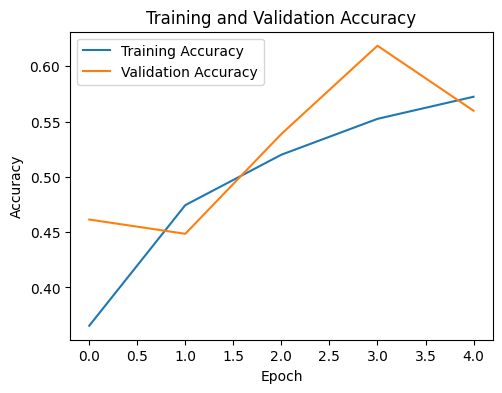

In [49]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

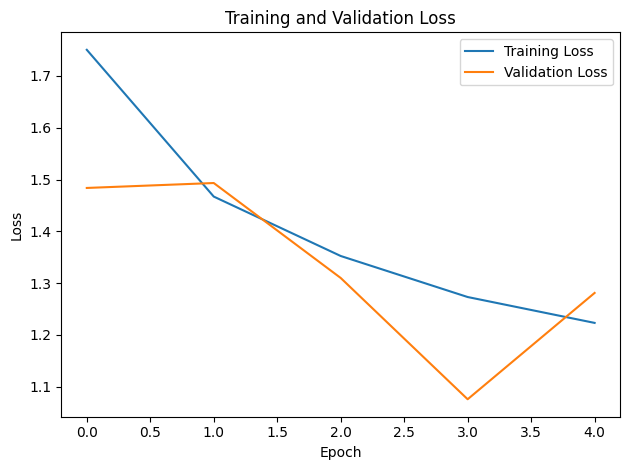

In [50]:
plt.subplot(1, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# **Using the model to predict on Different Number of Batches and Computing Overall Accuracy**

In [51]:
from tensorflow.keras.models import load_model
import random
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# Assuming you have the cifar10 dataset loaded
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [53]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [54]:
# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [55]:
# Load the pre-trained model
loaded_model = load_model('my_model.h5')

In [56]:
# Define label_mapping
label_mapping = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

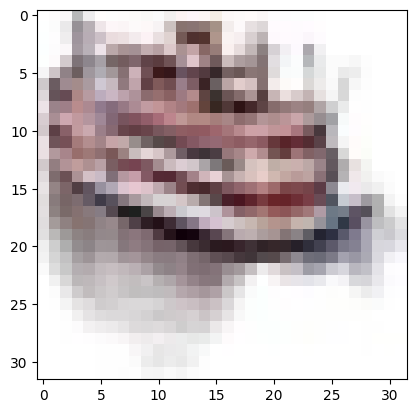

In [57]:
# Choose a random index from the test set
idx2 = random.randint(0, len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()

In [59]:
# Make predictions using the loaded model for a batch of images
batch_size = 5  # Adjust the batch size as needed
random_indices = [random.randint(0, len(y_test) - 1) for _ in range(batch_size)]
batch_images = x_test[random_indices]
batch_labels = y_test[random_indices]

y_pred_batch = loaded_model.predict(batch_images)
predicted_classes_batch = np.argmax(y_pred_batch, axis=1)

1/1 [==============================] - 0s 105ms/step


In [60]:
# Map the predicted class indices to labels
predicted_labels_batch = [label_mapping[pred_class] for pred_class in predicted_classes_batch]


In [61]:
# Calculate accuracy for each prediction
accuracies = [1 if np.argmax(true_label) == pred_label else 0
              for true_label, pred_label in zip(batch_labels, predicted_classes_batch)]

In [62]:
print("Predictions for the batch:")
for i, (true_label, pred_label, accuracy) in enumerate(zip(batch_labels, predicted_labels_batch, accuracies)):
    print(f"Image {i + 1}: True label: {label_mapping[np.argmax(true_label)]}, "
          f"Predicted label: {pred_label}, Accuracy: {accuracy}")


Predictions for the batch:
Image 1: True label: dog, Predicted label: deer, Accuracy: 0
Image 2: True label: dog, Predicted label: horse, Accuracy: 0
Image 3: True label: deer, Predicted label: truck, Accuracy: 0
Image 4: True label: automobile, Predicted label: automobile, Accuracy: 1
Image 5: True label: dog, Predicted label: deer, Accuracy: 0


In [63]:
# Calculate overall accuracy
overall_accuracy = sum(accuracies) / len(accuracies)
print(f"\nOverall accuracy for the batch: {overall_accuracy * 100:.2f}%")


Overall accuracy for the batch: 20.00%


In [2]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.2 MB/s eta 0:00:00


**Hyperparameter Tuning as Explained in the Report**


In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import kerastuner as kt

<ipython-input-3-64305d75e101>:8: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [4]:
# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 2s 0us/step


In [5]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
# Apply data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

In [8]:
# Prefetch data batches for improved data loading efficiency
train_data = datagen.flow(x_train, y_train, batch_size=256)  # Increased batch size


In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import kerastuner as kt

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Apply data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# Prefetch data batches for improved data loading efficiency
train_data = datagen.flow(x_train, y_train, batch_size=256)

# Function to build the model with hyperparameters
def build_hypermodel(hp):
    model = Sequential([
        Conv2D(
            filters=hp.Int('conv_1_filters', min_value=32, max_value=64, step=16),
            kernel_size=(3, 3),
            input_shape=(32, 32, 3)
        ),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D((2, 2)),

        Conv2D(
            filters=hp.Int('conv_2_filters', min_value=64, max_value=128, step=32),
            kernel_size=(3, 3)
        ),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D((2, 2)),

        Flatten(),

        Dense(units=hp.Int('dense_units', min_value=64, max_value=128, step=32)),
        BatchNormalization(),
        Activation('relu'),

        Dense(10, activation='softmax')
    ])

    hp_learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-3, sampling='LOG')
    hp_optimizer = hp.Choice('optimizer', values=['adam', 'sgd'])

    if hp_optimizer == 'adam':
        optimizer = Adam(learning_rate=hp_learning_rate)
    else:
        optimizer = SGD(learning_rate=hp_learning_rate, momentum=0.9)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize the tuner
tuner = kt.RandomSearch(
    build_hypermodel,
    objective='val_accuracy',
    max_trials=10,  # Set a fixed number of trials
    directory='random_search',
    project_name='cifar10_tuning'
)

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3)

# Perform hyperparameter tuning
tuner.search(
    x=x_train,
    y=y_train,
    epochs=5,  # Reduced epochs for tuning
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the best model with the best hyperparameters
history = best_model.fit(
    train_data,
    epochs=5,  # Reduced epochs for training
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)


Trial 10 Complete [00h 02m 06s]
val_accuracy: 0.6150000095367432

Best val_accuracy So Far: 0.7239999771118164
Total elapsed time: 00h 20m 52s
Epoch 1/5
196/196 [==============================] - 29s 142ms/step - loss: 1.4215 - accuracy: 0.4939 - val_loss: 3.5240 - val_accuracy: 0.1056
Epoch 2/5
196/196 [==============================] - 28s 142ms/step - loss: 1.1412 - accuracy: 0.5983 - val_loss: 2.1973 - val_accuracy: 0.3362
Epoch 3/5
196/196 [==============================] - 27s 140ms/step - loss: 1.0400 - accuracy: 0.6347 - val_loss: 0.9924 - val_accuracy: 0.6489
Epoch 4/5
196/196 [==============================] - 28s 141ms/step - loss: 0.9721 - accuracy: 0.6596 - val_loss: 1.2179 - val_accuracy: 0.6052
Epoch 5/5
196/196 [==============================] - 27s 137ms/step - loss: 0.9258 - accuracy: 0.6783 - val_loss: 0.9451 - val_accuracy: 0.6729


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import kerastuner as kt
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import kerastuner as kt
from tensorflow.keras.optimizers import Adam, SGD, Nadam

In [11]:
# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [12]:
# Data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
datagen.fit(x_train)


In [13]:
# Hyperparameters from the image
conv_1_filters = 64
conv_2_filters = 128
conv_3_filters = 96
dense_units = 128
learning_rate = 0.0023502
optimizer = 'nadam'

In [14]:
# Build the sequential model
model = Sequential([
    Conv2D(conv_1_filters, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(conv_2_filters, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(conv_3_filters, (3, 3), activation='relu'),
    Flatten(),
    Dense(dense_units, activation='relu'),
    Dense(10, activation='softmax')  # Assuming 10 classes as in CIFAR-10
])


In [15]:
# Compile the model with the Nadam optimizer and the given learning rate
model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

def lr_schedule(epoch):
    if epoch < 10:
        return learning_rate
    else:
        return learning_rate * (0.5 ** (epoch // 10))

lr_scheduler = LearningRateScheduler(lr_schedule)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [16]:
# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=10,
                    validation_data=(x_test, y_test),
                    callbacks=[lr_scheduler, early_stopping])

history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=40,
                    validation_data=(x_test, y_test),
                    callbacks=[lr_scheduler, early_stopping])
# Save the model
model.save('my_model.h5')



Epoch 1/10
782/782 [==============================] - 33s 41ms/step - loss: 1.5812 - accuracy: 0.4224 - val_loss: 1.2567 - val_accuracy: 0.5549 - lr: 0.0024
Epoch 2/10
782/782 [==============================] - 31s 40ms/step - loss: 1.2706 - accuracy: 0.5440 - val_loss: 1.0915 - val_accuracy: 0.6182 - lr: 0.0024
Epoch 3/10
782/782 [==============================] - 32s 41ms/step - loss: 1.1631 - accuracy: 0.5870 - val_loss: 0.9908 - val_accuracy: 0.6538 - lr: 0.0024
Epoch 4/10
782/782 [==============================] - 31s 40ms/step - loss: 1.0955 - accuracy: 0.6123 - val_loss: 0.9878 - val_accuracy: 0.6561 - lr: 0.0024
Epoch 5/10
782/782 [==============================] - 32s 41ms/step - loss: 1.0493 - accuracy: 0.6293 - val_loss: 0.9788 - val_accuracy: 0.6675 - lr: 0.0024
Epoch 6/10
782/782 [==============================] - 31s 40ms/step - loss: 1.0089 - accuracy: 0.6450 - val_loss: 0.8654 - val_accuracy: 0.6987 - lr: 0.0024
Epoch 7/10
782/782 [==============================] - 31s 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


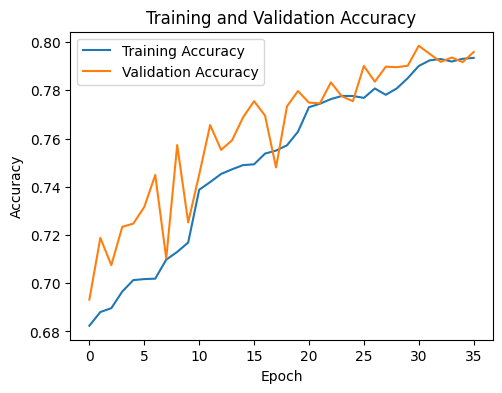

In [17]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

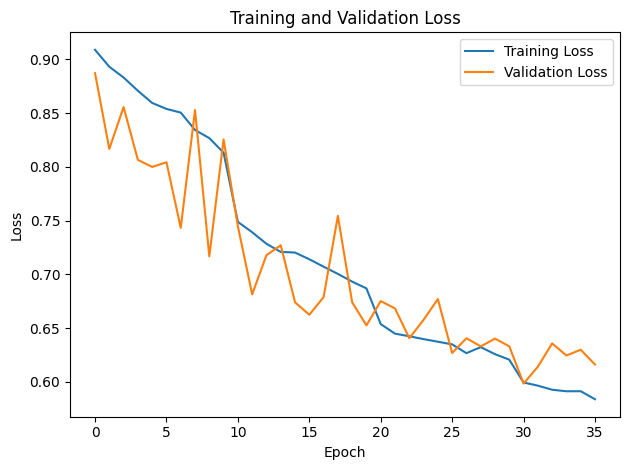

In [19]:
plt.subplot(1, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

**Training model after hyperparameter tuning**

In [22]:

import keras
from keras.models import load_model
import matplotlib.pyplot as plt

loaded_model = load_model('my_model.h5')

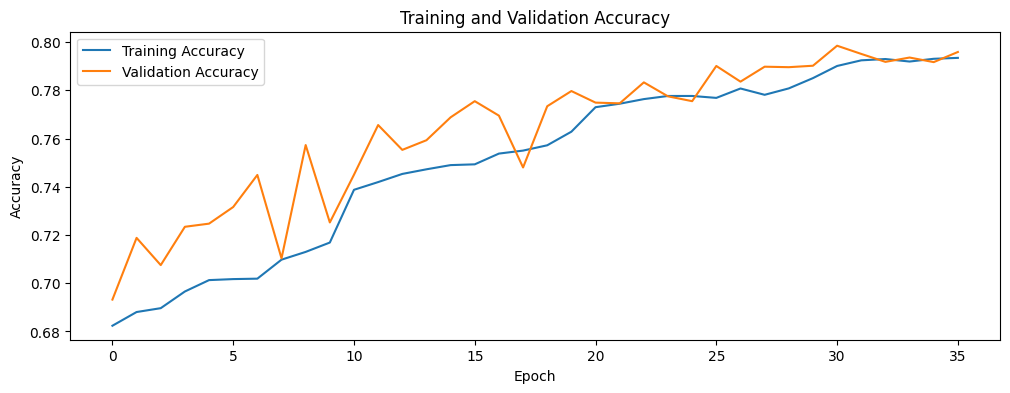

In [24]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

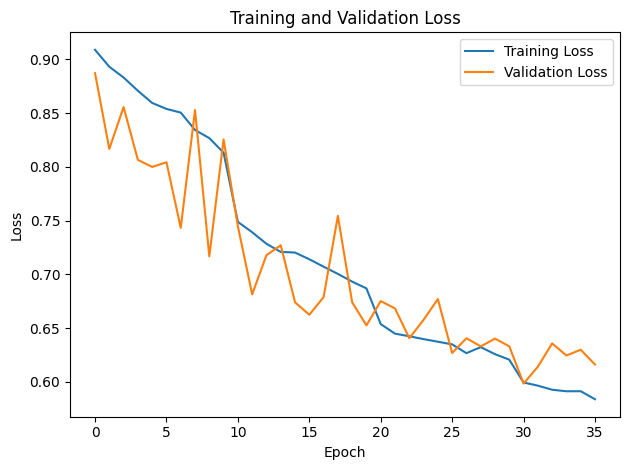

In [25]:
plt.subplot(1, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

**Hyperparameter tuning with number of batches and number of epochs**

In [26]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.optimizers import Nadam
from keras.utils import to_categorical
from keras.callbacks import LearningRateScheduler, EarlyStopping
import matplotlib.pyplot as plt
from keras.datasets import cifar10

In [27]:
# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [28]:
# Data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
datagen.fit(x_train)

In [29]:
# Hyperparameters from the image
conv_1_filters = 64
conv_2_filters = 128
conv_3_filters = 96
dense_units = 128
learning_rate = 0.0023502
optimizer = Nadam()

In [41]:
# Define different combinations
combinations = [
    {'epochs': 5, 'batch_size': 32},
    {'epochs': 5, 'batch_size': 64},
    {'epochs': 5, 'batch_size': 128},
    {'epochs': 5, 'batch_size': 64},
    {'epochs': 5, 'batch_size': 64}
]


In [42]:
# Plot setup
plt.figure(figsize=(12, 6))

for i, combo in enumerate(combinations):
    # Build the model
    model = Sequential([
        Conv2D(conv_1_filters, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(conv_2_filters, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(conv_3_filters, (3, 3), activation='relu'),
        Flatten(),
        Dense(dense_units, activation='relu'),
        Dense(10, activation='softmax')
    ])

<Figure size 1200x600 with 0 Axes>

In [43]:
  # Compile the model
model.compile(optimizer=Nadam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [44]:
    # Set up callbacks
lr_scheduler = LearningRateScheduler(lambda epoch: learning_rate * (0.5 ** (epoch // 10)))
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [45]:
 # Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=combo['batch_size']),
                        epochs=combo['epochs'],
                        validation_data=(x_test, y_test),
                        callbacks=[lr_scheduler, early_stopping],
                        verbose=0)

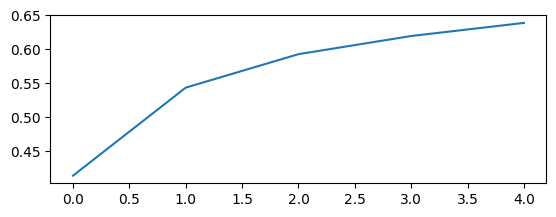

In [62]:
# Plot accuracy
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label=f'Combo {i+1}')  # Add label here


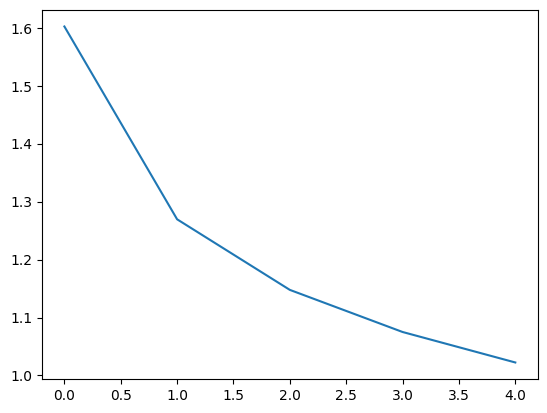

In [63]:
    # Plot loss
plt.subplot(1, 1, 1)
plt.plot(history.history['loss'], label=f'Combo {i+1}')

In [65]:
import keras
from keras.models import load_model
import random
import numpy as np
import matplotlib.pyplot as plt

In [66]:
# Assuming you have the cifar10 dataset loaded
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [67]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [68]:
# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [69]:
# Load the pre-trained model
loaded_model = load_model('my_model.h5')

In [70]:
# Define label_mapping
label_mapping = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

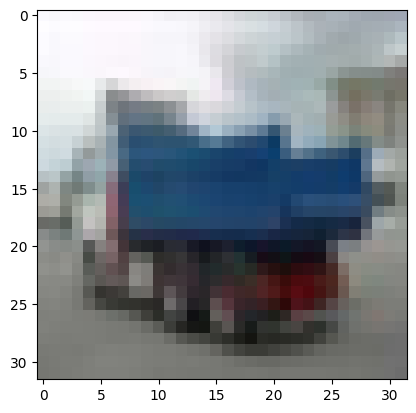

In [71]:
# Choose a random index from the test set
idx2 = random.randint(0, len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()

In [73]:
# Make predictions using the loaded model for a batch of images
batch_size = 5  # Adjust the batch size as needed
random_indices = [random.randint(0, len(y_test) - 1) for _ in range(batch_size)]
batch_images = x_test[random_indices]
batch_labels = y_test[random_indices]

y_pred_batch = loaded_model.predict(batch_images)
predicted_classes_batch = np.argmax(y_pred_batch, axis=1)

1/1 [==============================] - 0s 102ms/step


In [74]:
# Map the predicted class indices to labels
predicted_labels_batch = [label_mapping[pred_class] for pred_class in predicted_classes_batch]


In [75]:
# Calculate accuracy for each prediction
accuracies = [1 if np.argmax(true_label) == pred_label else 0
              for true_label, pred_label in zip(batch_labels, predicted_classes_batch)]


In [76]:
print("Predictions for the batch:")
for i, (true_label, pred_label, accuracy) in enumerate(zip(batch_labels, predicted_labels_batch, accuracies)):
    print(f"Image {i + 1}: True label: {label_mapping[np.argmax(true_label)]}, "
          f"Predicted label: {pred_label}, Accuracy: {accuracy}")


Predictions for the batch:
Image 1: True label: frog, Predicted label: frog, Accuracy: 1
Image 2: True label: cat, Predicted label: deer, Accuracy: 0
Image 3: True label: bird, Predicted label: bird, Accuracy: 1
Image 4: True label: cat, Predicted label: cat, Accuracy: 1
Image 5: True label: automobile, Predicted label: automobile, Accuracy: 1


In [77]:
# Calculate overall accuracy
overall_accuracy = sum(accuracies) / len(accuracies)
print(f"\nOverall accuracy for the batch: {overall_accuracy * 100:.2f}%")


Overall accuracy for the batch: 80.00%


In [78]:
from tensorflow.keras.models import load_model
import random
import numpy as np
import matplotlib.pyplot as plt


In [79]:
# Assuming you have the cifar10 dataset loaded
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Load the pre-trained model
loaded_model = load_model('my_model.h5')

y_pred_test = loaded_model.predict(x_test)
predicted_classes_test = np.argmax(y_pred_test, axis=1)

313/313 [==============================] - 1s 4ms/step


In [80]:
# Calculate accuracy for each prediction on the test set
accuracies_test = [1 if np.argmax(true_label) == pred_label else 0
                   for true_label, pred_label in zip(y_test, predicted_classes_test)]


In [81]:
# Calculate overall accuracy for the entire test set
overall_accuracy_test = sum(accuracies_test) / len(accuracies_test)
print(f"\nOverall accuracy for the entire test set: {overall_accuracy_test * 100:.2f}%")



Overall accuracy for the entire test set: 79.85%


In [82]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [83]:
# Define a function to generate and display the confusion matrix as a table
def display_confusion_matrix(true_labels, predicted_labels):
    cm = confusion_matrix(true_labels, predicted_labels)
    cm_df = pd.DataFrame(cm, index=range(10), columns=range(10))
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

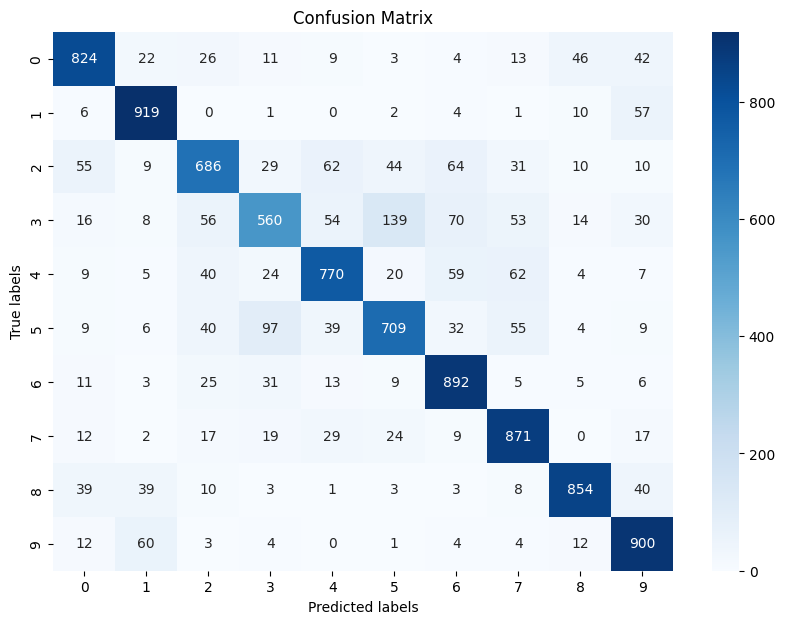

In [84]:
# Display confusion matrix for the test set
display_confusion_matrix(np.argmax(y_test, axis=1), predicted_classes_test)
